# 🧪 Taller - Rasterización desde Cero: Dibujando con Algoritmos Clásicos

🔍 **Objetivo del taller**

Comprender e implementar los algoritmos clásicos de rasterización para líneas, círculos y triángulos, entendiendo cómo se construyen imágenes píxel a píxel sin librerías gráficas de alto nivel.

In [1]:
# 📦 Librerías necesarias
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## ✅ 1. Preparar el entorno de dibujo

In [2]:
width, height = 200, 200
image = Image.new('RGB', (width, height), 'white')
pixels = image.load()

## ✅ 2. Algoritmo de Bresenham para líneas

In [3]:
def bresenham(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        if 0 <= x0 < width and 0 <= y0 < height:
            pixels[x0, y0] = (255, 0, 0)
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

# Dibujar línea de prueba
bresenham(20, 20, 180, 120)
image.save('linea.png')

## ✅ 3. Algoritmo de punto medio para círculos

In [4]:
def midpoint_circle(x0, y0, radius):
    x = radius
    y = 0
    p = 1 - radius

    while x >= y:
        for dx, dy in [(x, y), (y, x), (-x, y), (-y, x), (-x, -y), (-y, -x), (x, -y), (y, -x)]:
            if 0 <= x0 + dx < width and 0 <= y0 + dy < height:
                pixels[x0 + dx, y0 + dy] = (0, 0, 255)
        y += 1
        if p <= 0:
            p += 2 * y + 1
        else:
            x -= 1
            p += 2 * y - 2 * x + 1

# Dibujar círculo de prueba
midpoint_circle(100, 100, 40)
image.save('circulo.png')

## ✅ 4. Rellenar un triángulo (rasterización simple con scanlines)

In [5]:
def fill_triangle(p1, p2, p3):
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    def interpolate(y0, y1, x0, x1):
        if y1 - y0 == 0: return []
        return [int(x0 + (x1 - x0) * (y - y0) / (y1 - y0)) for y in range(y0, y1)]

    x12 = interpolate(y1, y2, x1, x2)
    x23 = interpolate(y2, y3, x2, x3)
    x13 = interpolate(y1, y3, x1, x3)

    x_left = x12 + x23
    for y, xl, xr in zip(range(y1, y3), x13, x_left):
        for x in range(min(xl, xr), max(xl, xr)):
            if 0 <= x < width and 0 <= y < height:
                pixels[x, y] = (0, 255, 0)

# Dibujar triángulo de prueba
fill_triangle((30, 50), (100, 150), (160, 60))
image.save('triangulo.png')

## ✅ 5. Mostrar imagen final

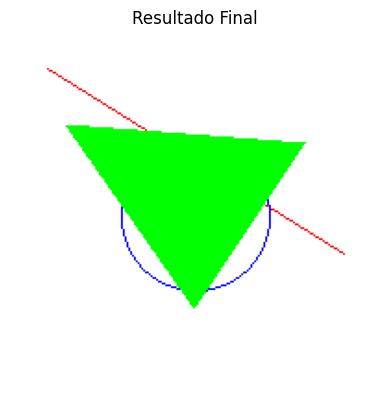

In [6]:
plt.imshow(image)
plt.axis('off')
plt.title("Resultado Final")
plt.show()